# 0. Load Python Modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


warnings.filterwarnings('ignore')

# 1. Load my data file and remove specific columns


In [8]:
df = pd.read_csv('../data/test_data.csv', index_col=0, parse_dates=True)
df.drop(columns=['is_holiday', 'date'], inplace=True)
print(df.head())

  day_of_week  month  capacity  temperature_max  meals
0     Tuesday      1     327.0              9.4  207.0
1   Wednesday      1     186.0             10.7  112.0
2    Thursday      1     386.0              8.4  252.0
3      Friday      1     227.0              8.9  127.0
4      Monday      1     284.0             -1.2  192.0


# 2. One Hote Encoding

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
ohetransform = ohe.fit_transform(df[['day_of_week']])
ohetransform_1 = ohe.fit_transform(df[['month']])
df = pd.concat([df, ohetransform, ohetransform_1],axis=1).drop(columns=['day_of_week', 'month'])
df.head()

,capacity,temperature_max,meals,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,327.0,9.4,207.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,186.0,10.7,112.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,386.0,8.4,252.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,227.0,8.9,127.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,284.0,-1.2,192.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Separate Target from Features 

In [10]:
#split the dataset into features and target variable
X = df.drop('meals', axis=1)
y = df['meals']    
##view the x and y variables
print("Features (X):\n", X.head())
print("Target (y):\n", y.head())

Features (X):
    capacity  temperature_max  day_of_week_Friday  day_of_week_Monday  \
0     327.0              9.4                 0.0                 0.0   
1     186.0             10.7                 0.0                 0.0   
2     386.0              8.4                 0.0                 0.0   
3     227.0              8.9                 1.0                 0.0   
4     284.0             -1.2                 0.0                 1.0   

   day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  month_1  \
0                   0.0                  1.0                    0.0      1.0   
1                   0.0                  0.0                    1.0      1.0   
2                   1.0                  0.0                    0.0      1.0   
3                   0.0                  0.0                    0.0      1.0   
4                   0.0                  0.0                    0.0      1.0   

   month_2  month_3  month_4  month_5  month_6  month_7  month_8  month

# 3. Splitting the dataset

In [11]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)    
print("Training set size:", X_train.shape) 
print("Testing set size:", X_test.shape)    

Training set size: (369, 19)
Testing set size: (93, 19)


# 4. Building the Random Forest Classifier

In [12]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

# 6. Evaluation of the Trained Model

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.7649603238111127
Mean Squared Error: 458.62696451612914
R-squared: 0.7844765311066813


# 7. Visualizing

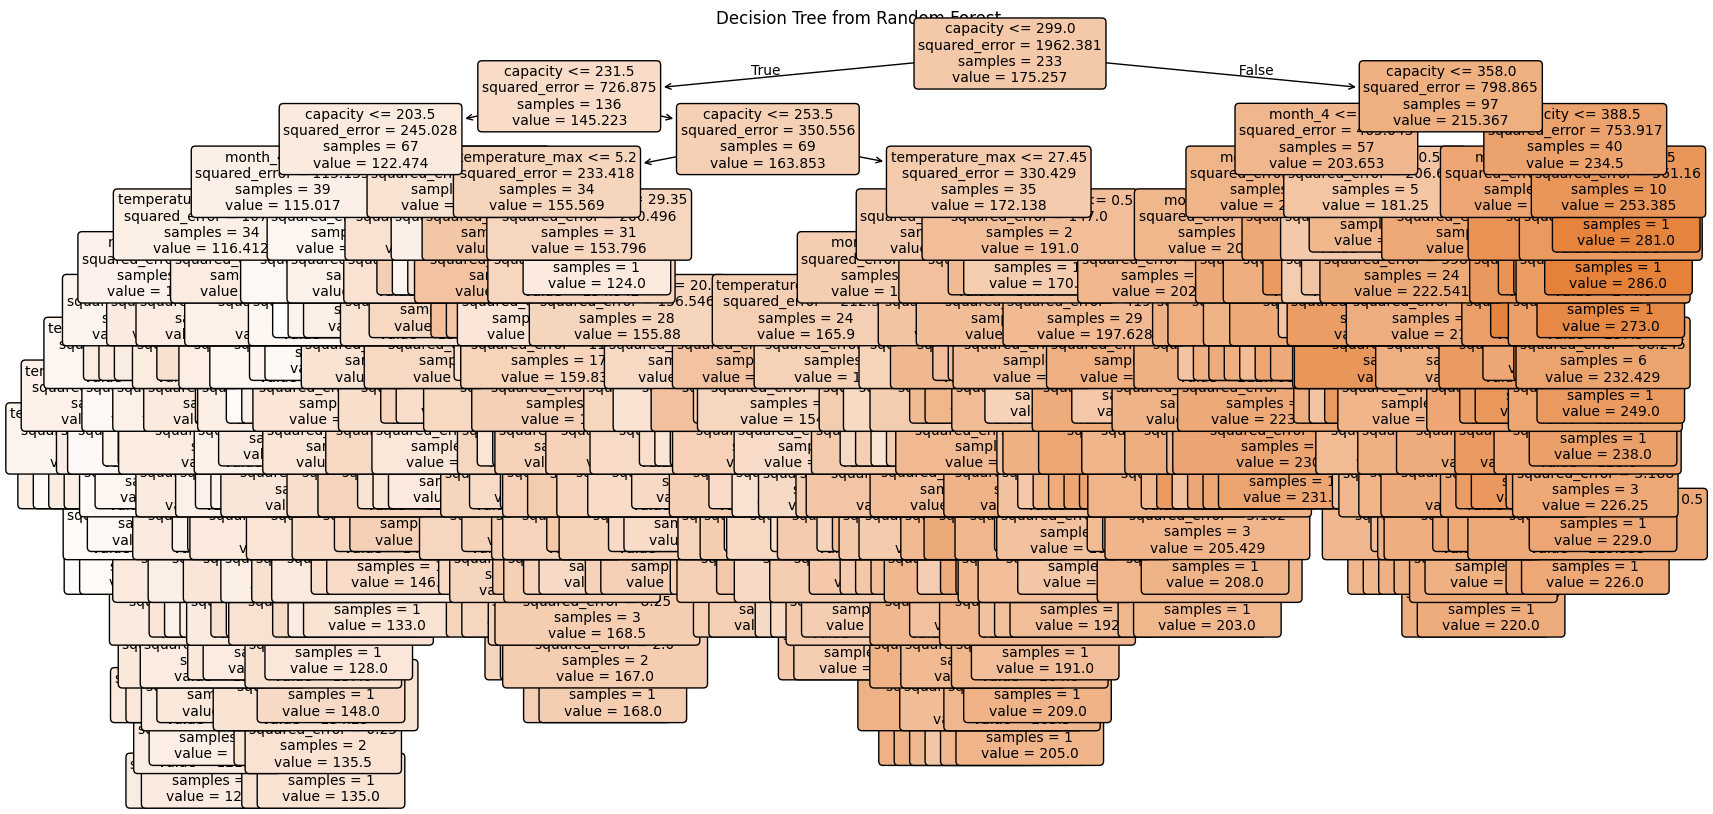

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

# 8. Save the model to a file

In [15]:
joblib.dump(regressor, 'random_forest_model.pkl')

['random_forest_model.pkl']